## Exercise 3 (p.332, Chap.8)

#### Consider the Gini index, classification error, and entropy in a simple classification setting with two classes. Create a single plot that displays each of these quantities as a function of ˆpm1. The x-axis should display ˆpm1, ranging from 0 to 1, and the y-axis should display the value of the Gini index, classification error, and entropy.
#### Hint: In a setting with two classes, pˆm1 = 1 − pˆm2. You could make this plot by hand, but it will be much easier to make in R.

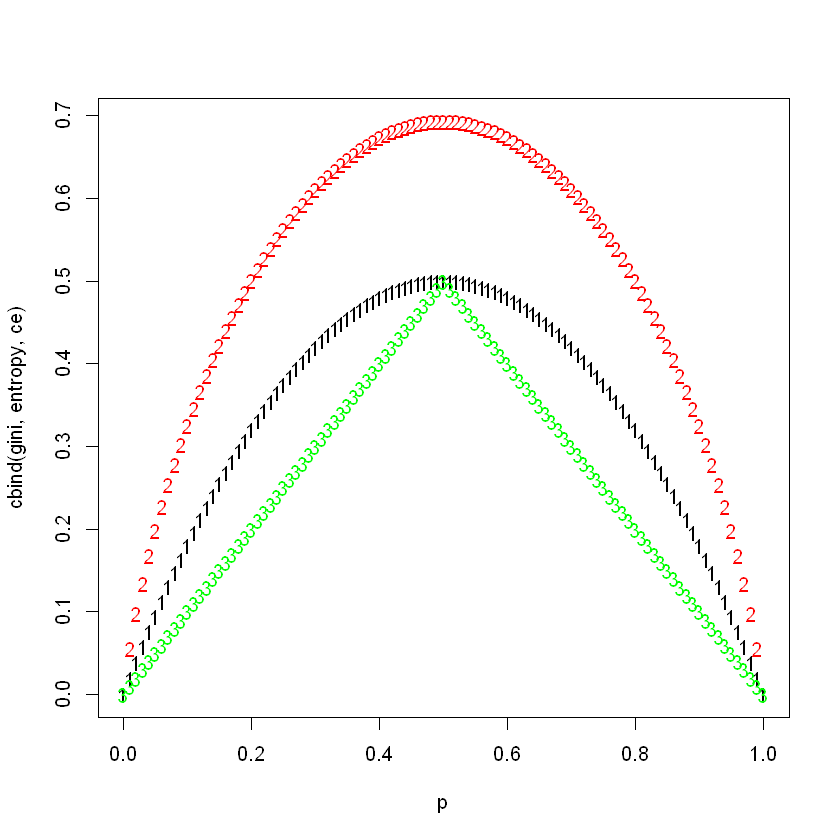

In [1]:
p=seq(0,1,0.01)
gini=p*(1-p)*2
entropy=-(p*log(p)+(1-p)*log(1-p))
ce=1-pmax(p,1-p)
matplot(p,cbind(gini,entropy,ce),col=c('black','red','green'))

## Exercise 5 (p.332, Chap.8)

#### 5. Suppose we produce ten bootstrapped samples from a data set containing red and green classes. We then apply a classification tree to each bootstrapped sample and, for a specific value of X, produce 10 estimates of P(Class is Red|X):
#### 0.1, 0.15, 0.2, 0.2, 0.55, 0.6, 0.6, 0.65, 0.7, and 0.75.
#### There are two common ways to combine these results together into a single class prediction. One is the majority vote approach discussed in this chapter. The second approach is to classify based on the average probability. In this example, what is the final classification under each of these two approaches?

In [2]:
p = c(0.1, 0.15, 0.2, 0.2, 0.55, 0.6, 0.6, 0.65, 0.7, 0.75)

In [3]:
# Majority vote approach
sum(p >= 0.5) > sum(p < 0.5)

[1] TRUE

In [4]:
# The number of red predictions is greater than the number of green predictions based on a 50% threshold, thus RED.

In [5]:
# Average probability approach
mean(p)

[1] 0.45

In [6]:
# The average of the probabilities is less than the 50% threshold, thus GREEN.

## Exercise 8 (p.333, Chap.8)

#### 8. In the lab, a classification tree was applied to the Carseats data set after converting Sales into a qualitative response variable. Now we will seek to predict Sales using regression trees and related approaches, treating the response as a quantitative variable.

#### (a) Split the data set into a training set and a test set.

In [7]:
library(ISLR)
attach(Carseats)
set.seed(530)

train = sample(dim(Carseats)[1], dim(Carseats)[1]/2)
Carseats_train = Carseats[train, ]
Carseats_test = Carseats[-train, ]

#### (b) Fit a regression tree to the training set. Plot the tree, and interpret the results. What test MSE do you obtain?

In [8]:
library(tree)
tree_carseats = tree(Sales ~ ., data = Carseats_train)
summary(tree_carseats)


Regression tree:
tree(formula = Sales ~ ., data = Carseats_train)
Variables actually used in tree construction:
[1] "ShelveLoc"   "Price"       "Age"         "Advertising" "CompPrice"  
Number of terminal nodes:  17 
Residual mean deviance:  2.093 = 383 / 183 
Distribution of residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-3.71000 -0.86490  0.03527  0.00000  0.91650  3.69000 

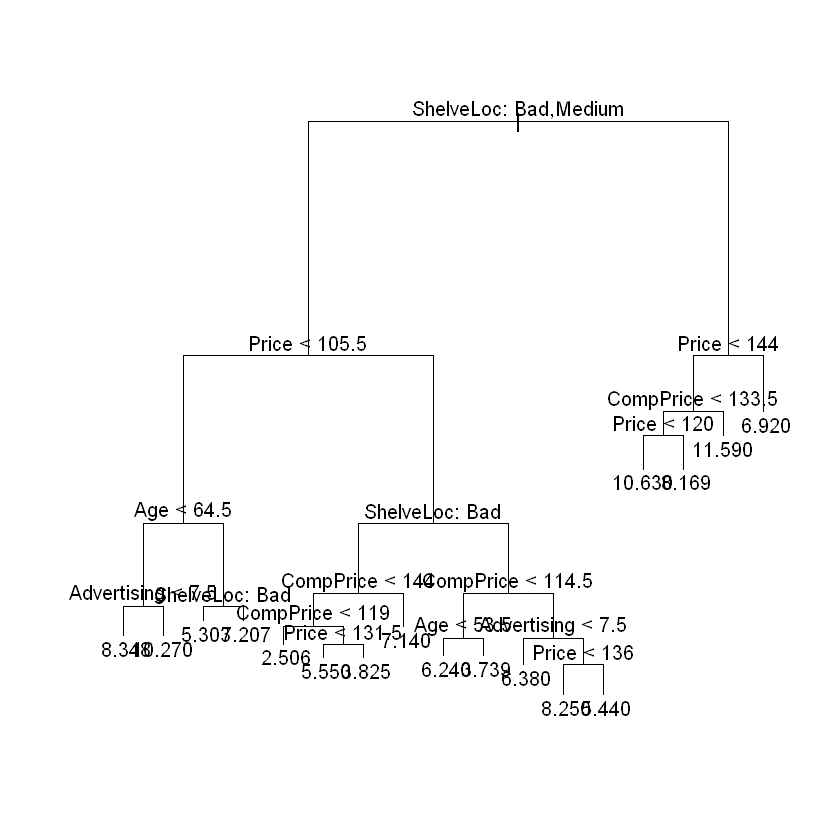

In [9]:
plot(tree_carseats)
text(tree_carseats, pretty = 0)

In [11]:
pred_carseats = predict(tree_carseats, Carseats_test)
mean((Carseats_test$Sales - pred_carseats)^2)

[1] 5.321307

In [ ]:
# The test MSE is about 5.32

#### (c) Use cross-validation in order to determine the optimal level of tree complexity. Does pruning the tree improve the test MSE?

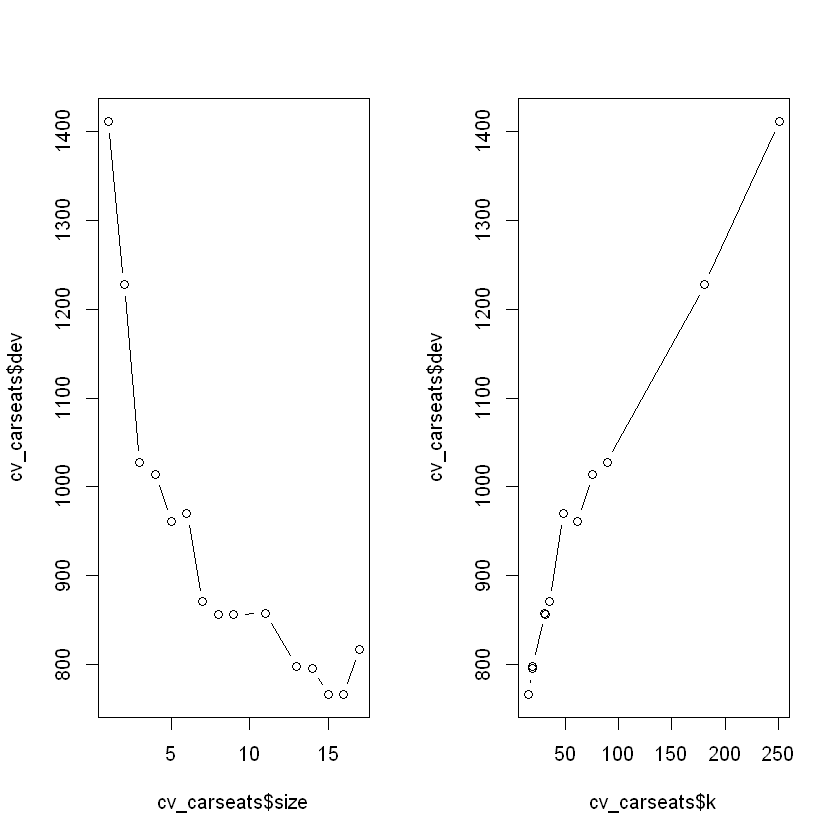

In [12]:
cv_carseats = cv.tree(tree_carseats, FUN = prune.tree)
par(mfrow = c(1, 2))
plot(cv_carseats$size, cv_carseats$dev, type = "b")
plot(cv_carseats$k, cv_carseats$dev, type = "b")

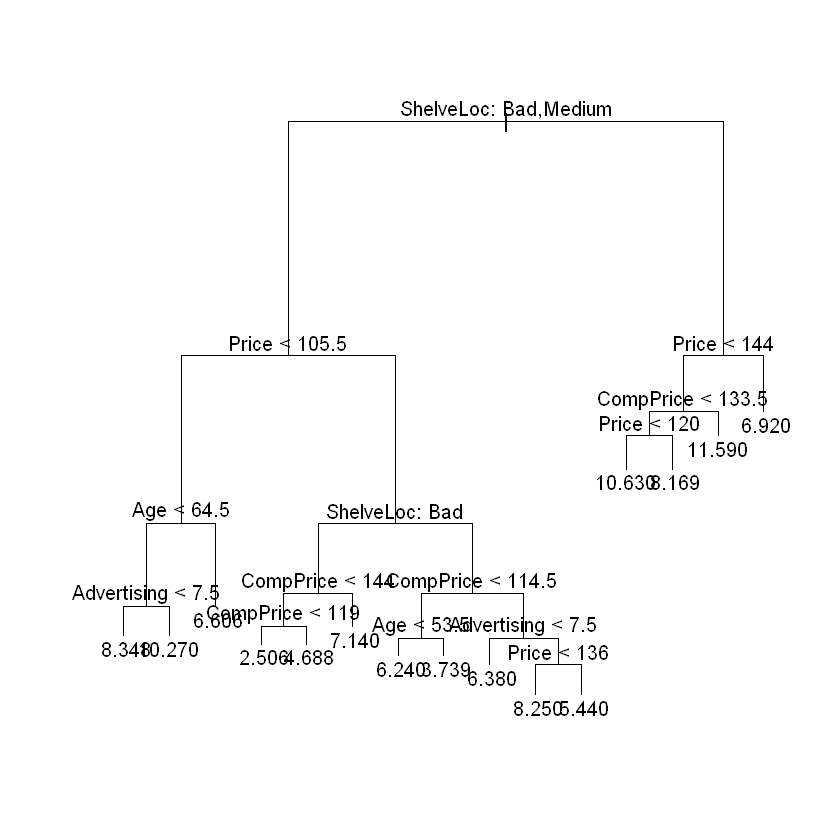

In [13]:
# Best size = 15
pruned_carseats = prune.tree(tree_carseats, best = 15)
par(mfrow = c(1, 1))
plot(pruned_carseats)
text(pruned_carseats, pretty = 0)

In [14]:
pred_pruned = predict(pruned_carseats, Carseats_test)
mean((Carseats_test$Sales - pred_pruned)^2)

[1] 5.287825

In [ ]:
# Pruning the tree in this case increases the test MSE to 5.29

#### (d) Use the bagging approach in order to analyze this data. What test MSE do you obtain? Use the importance() function to determine which variables are most important.

In [15]:
library(randomForest)
bag_carseats = randomForest(Sales ~ ., data = Carseats_train, mtry = 10, ntree = 500, 
    importance = T)
bag_pred = predict(bag_carseats, Carseats_test)
mean((Carseats_test$Sales - bag_pred)^2)

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.



[1] 3.360702

In [16]:
importance(bag_carseats)

,%IncMSE,IncNodePurity
CompPrice,21.4113877,149.391202
Income,0.1683101,68.020865
Advertising,15.7088993,148.405590
Population,-0.9065363,53.207292
Price,43.9986469,316.969970
ShelveLoc,47.9530420,343.309535
Age,18.9302907,154.189028
Education,1.2968054,50.142155
Urban,-2.5022467,5.647240
US,2.4758350,6.029274


In [ ]:
# Bagging improves the test MSE to 3.36. We also see that Price, ShelveLoc and Age are three most important predictors of Sale.

#### (e) Use random forests to analyze this data. What test MSE do you obtain? Use the importance() function to determine which variables are most important. Describe the effect of m, the number of variables considered at each split, on the error rate obtained.

In [17]:
rf_carseats = randomForest(Sales ~ ., data = Carseats_train, mtry = 5, ntree = 500, 
    importance = T)
rf_pred = predict(rf_carseats, Carseats_test)
mean((Carseats_test$Sales - rf_pred)^2)

[1] 3.586436

In [18]:
importance(rf_carseats)

,%IncMSE,IncNodePurity
CompPrice,14.1633715,136.942150
Income,0.8669286,84.365884
Advertising,18.0251041,168.972008
Population,-2.1936573,73.585302
Price,35.5513361,286.681650
ShelveLoc,39.9711958,296.997601
Age,15.2150318,150.950040
Education,3.0669088,59.715418
Urban,-3.3573723,8.327118
US,1.4281976,11.803623


In [ ]:
# In this case, random forest worsens the MSE on test set to 3.59. Changing mm varies test MSE between 3.36 to 3.59. This time Price, ShelveLoc and Advertising are three most important predictors of Sale.

## Exercise 9 (p.334, Chap.8)

#### (a) Create a training set containing a random sample of 800 observations, and a test set containing the remaining observations.

In [19]:
library(ISLR)
attach(OJ)
set.seed(530)

train = sample(dim(OJ)[1], 800)
OJ.train = OJ[train, ]
OJ.test = OJ[-train, ]

#### (b) Fit a tree to the training data, with Purchase as the response and the other variables as predictors. Use the summary() function to produce summary statistics about the tree, and describe the results obtained. What is the training error rate? How many terminal nodes does the tree have?

In [20]:
library(tree)
oj.tree = tree(Purchase ~ ., data = OJ.train)
summary(oj.tree)


Classification tree:
tree(formula = Purchase ~ ., data = OJ.train)
Variables actually used in tree construction:
[1] "LoyalCH"       "SpecialCH"     "ListPriceDiff" "PriceDiff"    
Number of terminal nodes:  7 
Residual mean deviance:  0.7556 = 599.2 / 793 
Misclassification error rate: 0.1525 = 122 / 800 

In [ ]:
# The tree only uses two variables: LoyalCH and PriceDiff. It has 7 terminal nodes. Training error rate (misclassification error) for the tree is 0.1525.

#### (c) Type in the name of the tree object in order to get a detailed text output. Pick one of the terminal nodes, and interpret the information displayed.

In [21]:
oj.tree

node), split, n, deviance, yval, (yprob)
      * denotes terminal node

 1) root 800 1070.00 CH ( 0.61000 0.39000 )  
   2) LoyalCH < 0.482935 306  331.50 MM ( 0.23203 0.76797 )  
     4) LoyalCH < 0.0356415 65   10.33 MM ( 0.01538 0.98462 ) *
     5) LoyalCH > 0.0356415 241  290.40 MM ( 0.29046 0.70954 )  
      10) SpecialCH < 0.5 217  245.70 MM ( 0.25346 0.74654 ) *
      11) SpecialCH > 0.5 24   31.76 CH ( 0.62500 0.37500 ) *
   3) LoyalCH > 0.482935 494  427.60 CH ( 0.84413 0.15587 )  
     6) LoyalCH < 0.764572 243  286.20 CH ( 0.72428 0.27572 )  
      12) ListPriceDiff < 0.235 97  134.50 MM ( 0.49485 0.50515 )  
        24) PriceDiff < 0.015 52   64.19 MM ( 0.30769 0.69231 ) *
        25) PriceDiff > 0.015 45   54.10 CH ( 0.71111 0.28889 ) *
      13) ListPriceDiff > 0.235 146  109.00 CH ( 0.87671 0.12329 ) *
     7) LoyalCH > 0.764572 251   84.05 CH ( 0.96016 0.03984 ) *

In [ ]:
# Let's pick terminal node labeled “10)”. The splitting variable at this node is SpecialCH. The splitting value of this node is 0.5. There are 217 points in the subtree below this node. The deviance for all points contained in region below this node is 245.70. A * in the line denotes that this is in fact a terminal node. The prediction at this node is Sales = MM. About 25% points in this node have CH as value of Sales. Remaining 75% points have MM as value of Sales.

#### (d) Create a plot of the tree, and interpret the results.

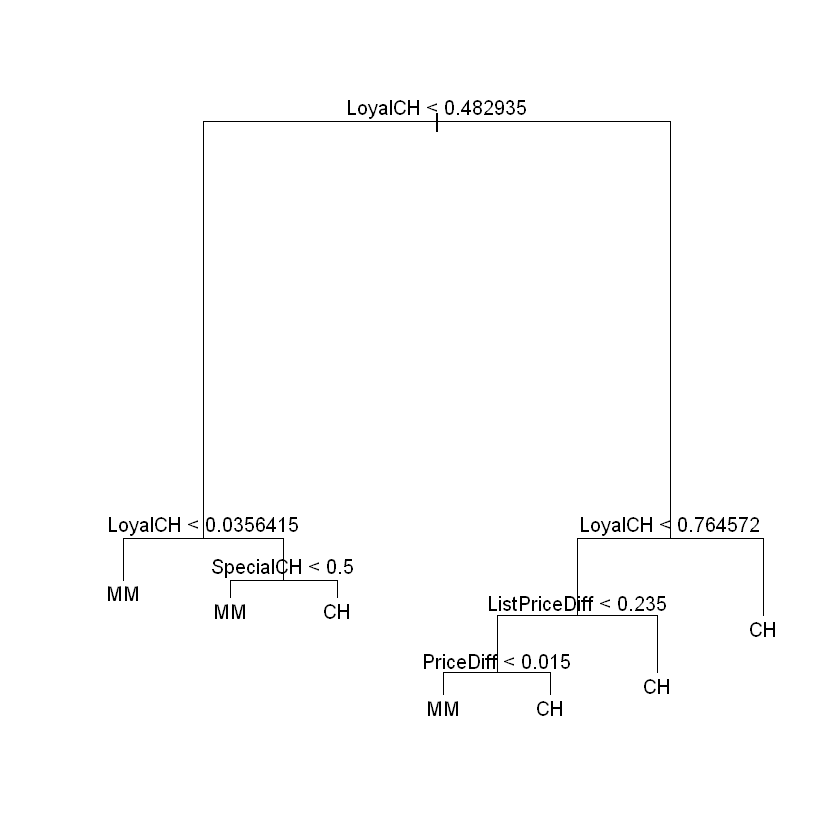

In [22]:
plot(oj.tree)
text(oj.tree, pretty = 0)

In [ ]:
# LoyalCH is the most important variable of the tree, in fact top 3 nodes contain LoyalCH. If LoyalCH<0.0356415, the tree predicts MM. If LoyalCH>0.764572, the tree predicts CH. For intermediate values of LoyalCH, the decision also depends on the value of SpecialCH,ListPriceDiff & PriceDiff.

#### (e) Predict the response on the test data, and produce a confusion matrix comparing the test labels to the predicted test labels. What is the test error rate?

In [23]:
oj.pred = predict(oj.tree, OJ.test, type = "class")
table(OJ.test$Purchase, oj.pred)

    oj.pred
      CH  MM
  CH 139  26
  MM  26  79

#### (f) Apply the cv.tree() function to the training set in order to determine the optimal tree size.

In [24]:
cv.oj = cv.tree(oj.tree, FUN = prune.tree)

#### (g) Produce a plot with tree size on the x-axis and cross-validated classification error rate on the y-axis.

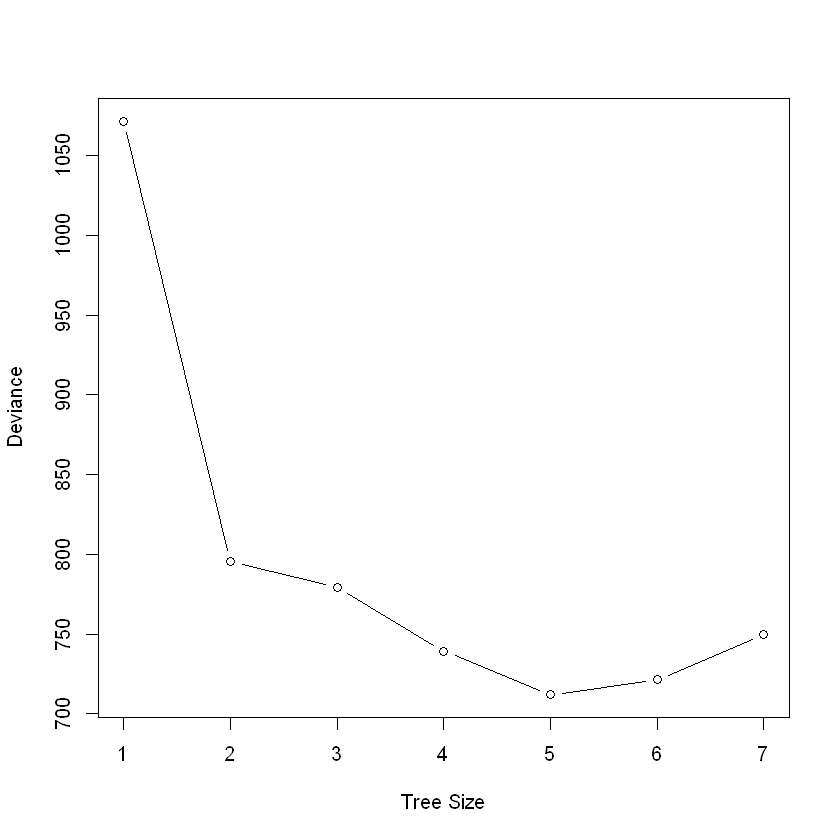

In [25]:
plot(cv.oj$size, cv.oj$dev, type = "b", xlab = "Tree Size", ylab = "Deviance")

#### (h) Which tree size corresponds to the lowest cross-validated classification error rate?

In [ ]:
# Size of 5 gives lowest cross-validation error.

#### (i) Produce a pruned tree corresponding to the optimal tree size obtained using cross-validation. If cross-validation does not lead to selection of a pruned tree, then create a pruned tree with five terminal nodes.

In [30]:
oj.pruned = prune.tree(oj.tree, best = 5)

#### (j) Compare the training error rates between the pruned and unpruned trees. Which is higher

In [31]:
summary(oj.pruned)


Classification tree:
snip.tree(tree = oj.tree, nodes = c(5L, 12L))
Variables actually used in tree construction:
[1] "LoyalCH"       "ListPriceDiff"
Number of terminal nodes:  5 
Residual mean deviance:  0.7903 = 628.3 / 795 
Misclassification error rate: 0.1838 = 147 / 800 

In [ ]:
# Misclassification error of pruned tree (0.1838) is higher than that of original tree of 0.1525.

#### (k) Compare the test error rates between the pruned and unpruned trees. Which is higher?

In [32]:
pred.unpruned = predict(oj.tree, OJ.test, type = "class")
misclass.unpruned = sum(OJ.test$Purchase != pred.unpruned)
misclass.unpruned/length(pred.unpruned)

[1] 0.1925926

In [33]:
pred.pruned = predict(oj.pruned, OJ.test, type = "class")
misclass.pruned = sum(OJ.test$Purchase != pred.pruned)
misclass.pruned/length(pred.pruned)

[1] 0.1962963

In [ ]:
# Pruned have the test error rate 0.196 and unpruned trees have the test error rate of 0.193.

## Exercise 10 (p.334, Chap.8)

#### 10. We now use boosting to predict Salary in the Hitters data set.

#### (a) Remove the observations for whom the salary information is unknown, and then log-transform the salaries.

In [34]:
library(ISLR)
sum(is.na(Hitters$Salary))

[1] 59

In [35]:
Hitters = Hitters[-which(is.na(Hitters$Salary)), ]
sum(is.na(Hitters$Salary))

[1] 0

In [36]:
Hitters$Salary = log(Hitters$Salary)

#### (b) Create a training set consisting of the first 200 observations, and a test set consisting of the remaining observations.

In [37]:
train = 1:200
Hitters.train = Hitters[train, ]
Hitters.test = Hitters[-train, ]

#### (c) Perform boosting on the training set with 1,000 trees for a range of values of the shrinkage parameter λ. Produce a plot with different shrinkage values on the x-axis and the corresponding training set MSE on the y-axis.

In [38]:
library(gbm)

Loaded gbm 2.1.8



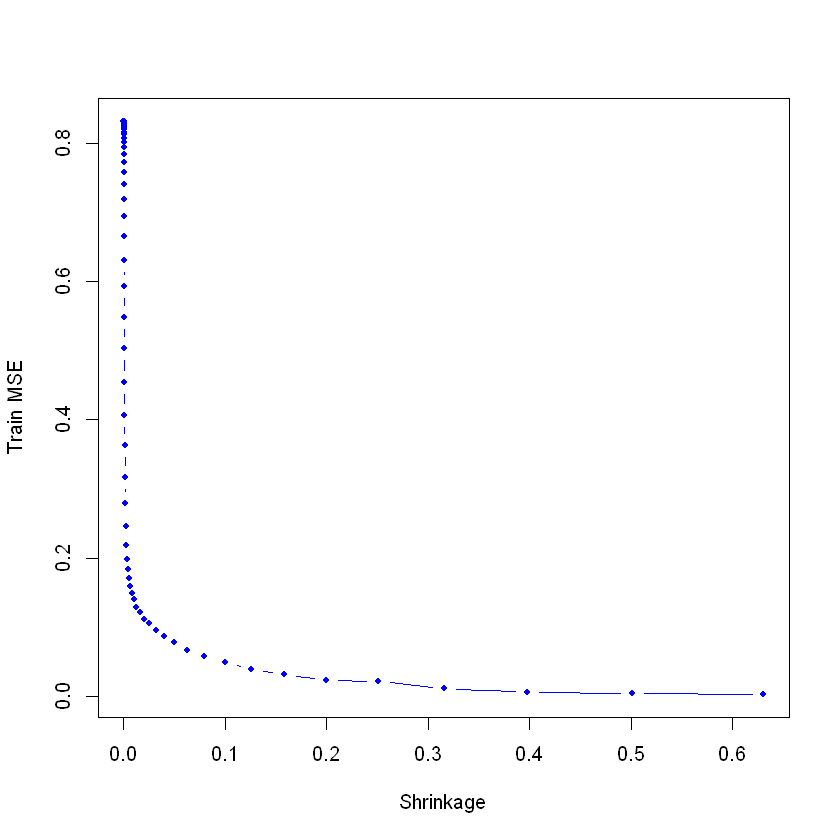

In [39]:
set.seed(530)
pows = seq(-10, -0.2, by = 0.1)
lambdas = 10^pows
length.lambdas = length(lambdas)
train.errors = rep(NA, length.lambdas)
test.errors = rep(NA, length.lambdas)
for (i in 1:length.lambdas) {
    boost.hitters = gbm(Salary ~ ., data = Hitters.train, distribution = "gaussian", 
        n.trees = 1000, shrinkage = lambdas[i])
    train.pred = predict(boost.hitters, Hitters.train, n.trees = 1000)
    test.pred = predict(boost.hitters, Hitters.test, n.trees = 1000)
    train.errors[i] = mean((Hitters.train$Salary - train.pred)^2)
    test.errors[i] = mean((Hitters.test$Salary - test.pred)^2)
}

plot(lambdas, train.errors, type = "b", xlab = "Shrinkage", ylab = "Train MSE", 
    col = "blue", pch = 20)

#### (d) Produce a plot with different shrinkage values on the x-axis and the corresponding test set MSE on the y-axis.

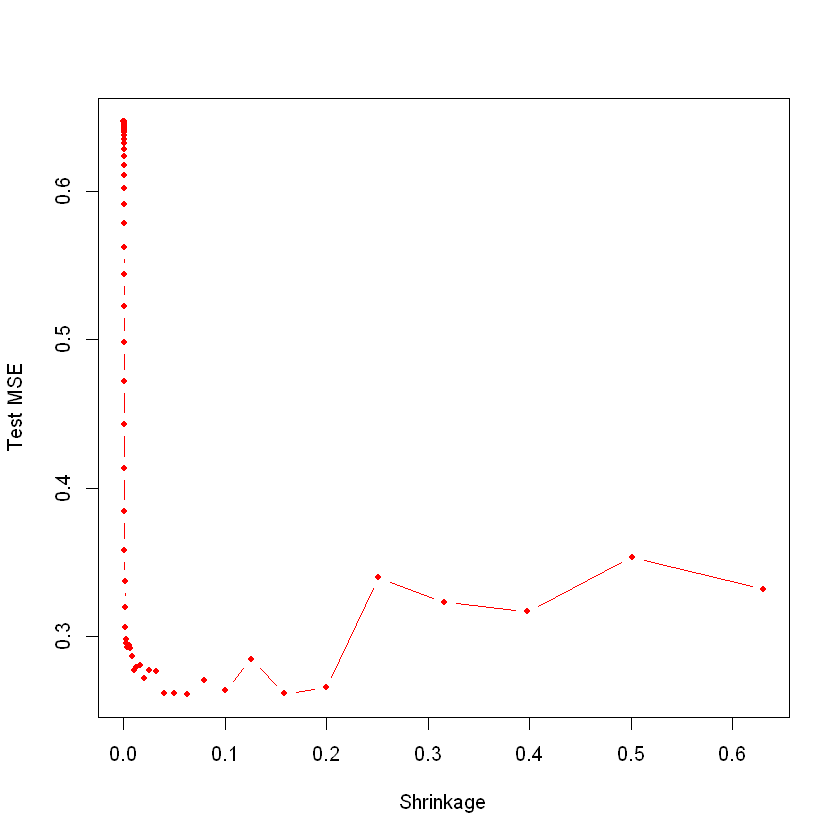

In [40]:
plot(lambdas, test.errors, type = "b", xlab = "Shrinkage", ylab = "Test MSE", 
    col = "red", pch = 20)

In [41]:
min(test.errors)

[1] 0.2605588

In [42]:
lambdas[which.min(test.errors)]

[1] 0.06309573

In [ ]:
# Minimum test error is obtained at λ=0.06.

#### (e) Compare the test MSE of boosting to the test MSE that results from applying two of the regression approaches seen in Chapters 3 and 6.

In [43]:
lm.fit = lm(Salary ~ ., data = Hitters.train)
lm.pred = predict(lm.fit, Hitters.test)
mean((Hitters.test$Salary - lm.pred)^2)

[1] 0.4917959

In [44]:
library(glmnet)

Loading required package: Matrix

Loaded glmnet 4.1-2



In [45]:
set.seed(530)
x = model.matrix(Salary ~ ., data = Hitters.train)
y = Hitters.train$Salary
x.test = model.matrix(Salary ~ ., data = Hitters.test)
lasso.fit = glmnet(x, y, alpha = 1)
lasso.pred = predict(lasso.fit, s = 0.01, newx = x.test)
mean((Hitters.test$Salary - lasso.pred)^2)

[1] 0.4700537

In [ ]:
# Both linear model and regularization like Lasso have higher test MSE than boosting.

#### (f) Which variables appear to be the most important predictors in the boosted model?

,var,rel.inf
,<chr>,<dbl>
CAtBat,CAtBat,14.6053837
CRuns,CRuns,10.1383334
CRBI,CRBI,9.9721556
CWalks,CWalks,8.0289382
PutOuts,PutOuts,7.3238650
Walks,Walks,6.7851542
Years,Years,6.5382376
RBI,RBI,6.1060934
CHits,CHits,5.5756845


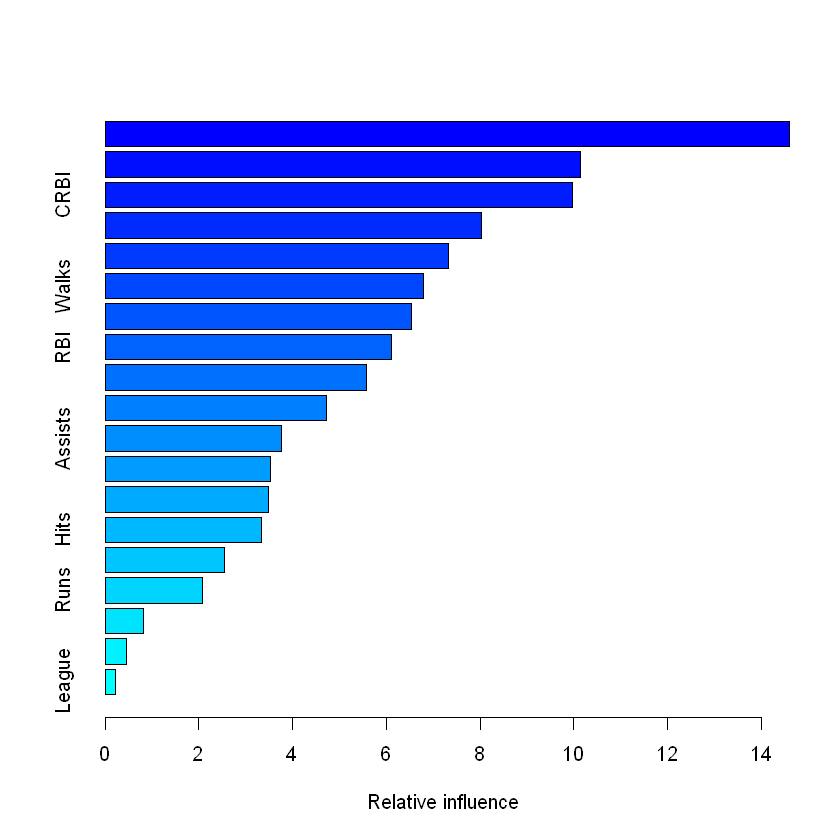

In [46]:
boost.best = gbm(Salary ~ ., data = Hitters.train, distribution = "gaussian", 
    n.trees = 1000, shrinkage = lambdas[which.min(test.errors)])
summary(boost.best)

In [ ]:
# CAtBat, CRuns and CRBI are three most important variables in that order.

#### (g) Now apply bagging to the training set. What is the test set MSE for this approach?

In [47]:
library(randomForest)

In [48]:
set.seed(530)
rf.hitters = randomForest(Salary ~ ., data = Hitters.train, ntree = 500, mtry = 19)
rf.pred = predict(rf.hitters, Hitters.test)
mean((Hitters.test$Salary - rf.pred)^2)

[1] 0.2250333

In [ ]:
# Test MSE for bagging is about 0.225, which is slightly lower than the best test MSE for boosting.